In [1]:
import pandas as pd
df=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [2]:
# Changing binary to word (0- non-Diabetes, 1- Diabetes)
import seaborn as sns
import numpy as np

df['Diabetes_binary']=np.where(df['Diabetes_binary']==1,"Diabetic","Non Diabetic")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Non Diabetic,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,Non Diabetic,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,Non Diabetic,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,Non Diabetic,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,Non Diabetic,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
from keras.models import Sequential
from keras.layers import Dense  
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load test data into a DataFrame
df_test = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv') 

# Separate X_test and y_test
X_test = df_test.drop('Diabetes_binary', axis=1)  
y_test = df_test['Diabetes_binary']

# Split training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Create model, compile
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model with data augmentation 
history = model.fit(X_train, y_train,  
          epochs=300,
          validation_data=(X_val, y_val),
          verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Threshold predictions for binary classification
y_pred = (y_pred > 0.5).astype(int)

# Print evaluation metrics
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

# Print classification report
print(classification_report(y_test, y_pred))

Epoch 1/300
1768/1768 [==============================] - 3s 1ms/step - loss: 0.5706 - accuracy: 0.7123 - val_loss: 0.5318 - val_accuracy: 0.7339
Epoch 2/300
1768/1768 [==============================] - 2s 1ms/step - loss: 0.5252 - accuracy: 0.7372 - val_loss: 0.5200 - val_accuracy: 0.7406
Epoch 3/300
1768/1768 [==============================] - 2s 1ms/step - loss: 0.5208 - accuracy: 0.7405 - val_loss: 0.5159 - val_accuracy: 0.7439
Epoch 4/300
1768/1768 [==============================] - 2s 1ms/step - loss: 0.5182 - accuracy: 0.7426 - val_loss: 0.5219 - val_accuracy: 0.7413
Epoch 5/300
1768/1768 [==============================] - 2s 1ms/step - loss: 0.5170 - accuracy: 0.7443 - val_loss: 0.5135 - val_accuracy: 0.7435
Epoch 6/300
1768/1768 [==============================] - 2s 1ms/step - loss: 0.5153 - accuracy: 0.7454 - val_loss: 0.5142 - val_accuracy: 0.7445
Epoch 7/300
1768/1768 [==============================] - 2s 1ms/step - loss: 0.5136 - accuracy: 0.7456 - val_loss: 0.5086 - val_ac

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  

# Evaluate metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred) 
f1   = f1_score(y_test, y_pred)

# Print metrics  
print("Accuracy: %.3f" % acc)
print("Precision: %.3f" % prec)
print("Recall: %.3f" % rec) 
print("F1 Score: %.3f" % f1)

Accuracy: 0.756
Precision: 0.734
Recall: 0.804
F1 Score: 0.768


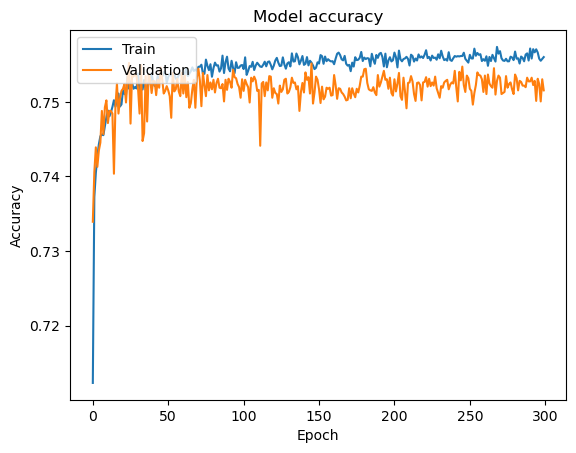

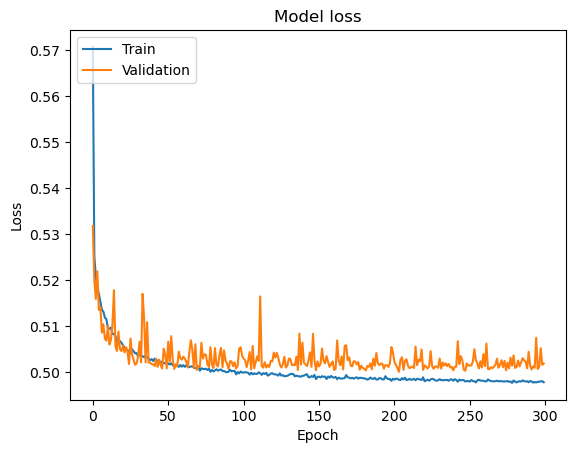

In [7]:
import matplotlib.pyplot as plt

# Plot accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss')  
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

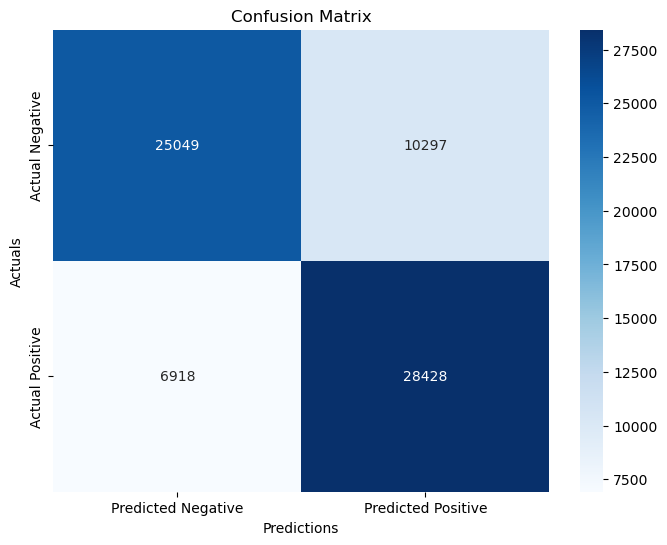

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()